# Zadanie rekrutacyjne 3 - Regresja logistyczna

Twoim zadaniem jest opracowanie __modelu regresji logistycznej__.

## Analiza danych

Przeanalizuj dane dostarczone w pliku `dane_zadanie_v1.0.xlsx`. 

Czy na ich podstawie zdecydujesz się opracować model regresji logistycznej? Uzasadnij odpowiedź.

Jeśli decydujesz się opracować model napisz także:
- Czy mimo wszystko masz jakieś wątpliwości? 
- Czy brakuje Ci informacji, które mogłyby w Twojej ocenie pomóc?

In [1]:
!python3 --version

Python 3.10.12


In [2]:
!pip list | grep -E "matplotlib|seaborn|scikit-learn|pandas|numpy"

matplotlib                   3.9.0
matplotlib-inline            0.1.7
numpy                        1.26.4
pandas                       2.2.2
scikit-learn                 1.5.0
seaborn                      0.13.2


In [3]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
file_path = 'dane_zadanie_v1.0.xlsx'
data = pd.read_excel(file_path)
data.head()

Zm1       Zm2     Zm3_a     Zm3_b        Zm3_c         Zm3    Zm4  \
0   47  2.556346  0.245325  0.837421  1008.068531  207.098028    NaN   
1   52  5.440271  0.466611  0.184779  1000.823017   86.290555  Kat_d   
2   55  1.907546  0.970312  0.396966  1004.789753  387.025911  Kat_a   
3   51  7.990015  0.104896  0.875934  1004.476626   92.293651  Kat_d   
4   33  1.175730  0.860810  0.458833  1000.042185  394.984532  Kat_a   

         Zm5  Target  
0  14.187720       0  
1  30.193503       1  
2  10.586882       1  
3  44.344586       1  
4   6.525302       1

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zm1     100 non-null    int64  
 1   Zm2     100 non-null    float64
 2   Zm3_a   100 non-null    float64
 3   Zm3_b   100 non-null    float64
 4   Zm3_c   100 non-null    float64
 5   Zm3     100 non-null    float64
 6   Zm4     77 non-null     object 
 7   Zm5     100 non-null    float64
 8   Target  100 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 7.2+ KB


- Zmienna  Target jest binarna, co jest odpowiednie dla regresji logistycznej.
- Dla zmiennej Zm4 występują wartości NaN, pytanie czy usunąć całą kolumne, pojedyczne wiersze czy przypisać im wartość która by mówiłą, że są not defined.
- Zm4 również trzeba zmienić do wartości licznowych

In [6]:
data = data.dropna(subset=['Zm4'])
data.head()

Zm1       Zm2     Zm3_a     Zm3_b        Zm3_c         Zm3    Zm4  \
1   52  5.440271  0.466611  0.184779  1000.823017   86.290555  Kat_d   
2   55  1.907546  0.970312  0.396966  1004.789753  387.025911  Kat_a   
3   51  7.990015  0.104896  0.875934  1004.476626   92.293651  Kat_d   
4   33  1.175730  0.860810  0.458833  1000.042185  394.984532  Kat_a   
6   41  0.467024  0.580860  0.560523  1002.147673  326.284872  Kat_a   

         Zm5  Target  
1  30.193503       1  
2  10.586882       1  
3  44.344586       1  
4   6.525302       1  
6   2.591982       1

In [7]:
data = pd.get_dummies(data, columns=['Zm4'], drop_first=True)
data.head()


Zm1       Zm2     Zm3_a     Zm3_b        Zm3_c         Zm3        Zm5  \
1   52  5.440271  0.466611  0.184779  1000.823017   86.290555  30.193503   
2   55  1.907546  0.970312  0.396966  1004.789753  387.025911  10.586882   
3   51  7.990015  0.104896  0.875934  1004.476626   92.293651  44.344586   
4   33  1.175730  0.860810  0.458833  1000.042185  394.984532   6.525302   
6   41  0.467024  0.580860  0.560523  1002.147673  326.284872   2.591982   

   Target  Zm4_Kat_c  Zm4_Kat_d  
1       1      False       True  
2       1      False      False  
3       1      False       True  
4       1      False      False  
6       1      False      False

In [8]:
data.describe()

Zm1        Zm2      Zm3_a      Zm3_b        Zm3_c         Zm3  \
count  77.000000  77.000000  77.000000  77.000000    77.000000   77.000000   
mean   49.142857   3.445322   0.462166   0.464225  1004.616672  211.051826   
std     9.483662   3.717858   0.314972   0.266305     2.793213  203.079605   
min    23.000000   0.044092   0.004823   0.008774  1000.042185    2.937046   
25%    42.000000   1.073507   0.174824   0.263235  1002.147673   46.272988   
50%    50.000000   2.172214   0.406293   0.455056  1004.399122  131.679344   
75%    55.000000   4.294444   0.743908   0.646451  1006.897657  326.284872   
max    69.000000  20.317462   0.998535   0.917712  1009.994391  838.380260   

              Zm5     Target  
count   77.000000  77.000000  
mean    19.121535   0.402597  
std     20.634111   0.493637  
min      0.244712   0.000000  
25%      5.957963   0.000000  
50%     12.055788   0.000000  
75%     23.834162   1.000000  
max    112.761916   1.000000

- 50% lub więcej wartości w kolumnie Target wynosi 0.
- Między 50% a 75% wartości w kolumnie Target wynosi 0.
- Między 75% a 100% wartości w kolumnie Target wynosi 1.

Takie rozkłady sugerują, że klasa 0 jest znacznie bardziej powszechna niż klasa 1. W kontekście uczenia maszynowego może to oznaczać, że masz do czynienia z niezbalansowanym zbiorem danych. Kilka kwestii, które mogą wynikać z takiej sytuacji to:

Niezbalansowany zbiór danych: Model może być bardziej skłonny do przewidywania klasy dominującej (0), co może prowadzić do problemów z dokładnością i efektywnością w przewidywaniu mniejszościowej klasy (1).

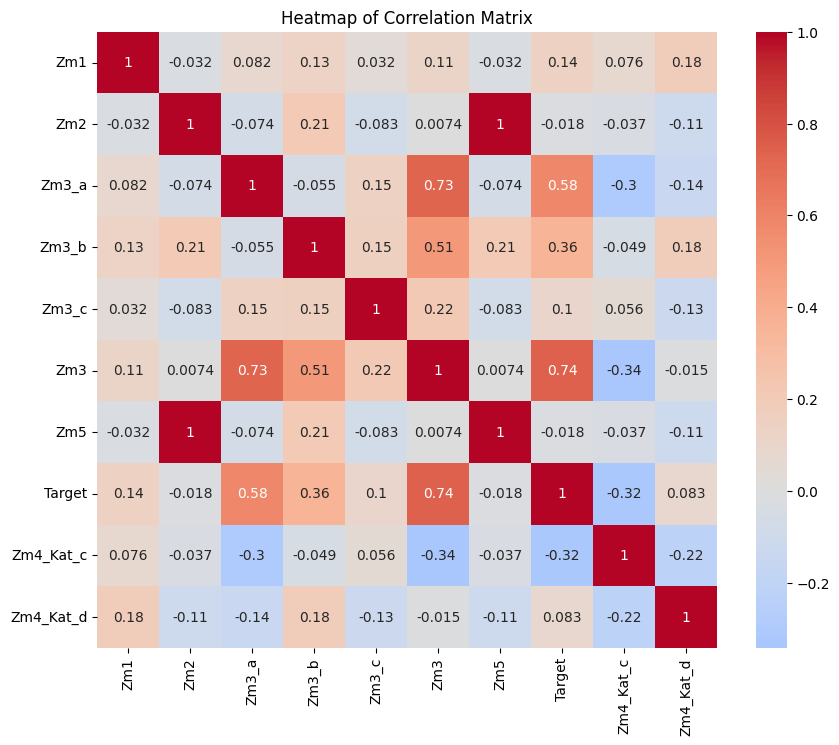

In [9]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Matrix')
plt.show()

- Zm2 jest silnie skorelowane z zmienną 5
##
W kontekście uczenia maszynowego, jeśli dwie zmienne (cechy) są skorelowane na poziomie 1 (czyli mają korelację wynoszącą 1), oznacza to, że są one doskonale skorelowane. Obecność zmiennych doskonale skorelowanych prowadzi do problemu kolinearności (lub współliniowości) w modelach liniowych (np. regresja liniowa, regresja logistyczna). Kolinearność może powodować problemy z interpretacją współczynników modelu oraz prowadzić do niestabilnych szacunków współczynników.\
Decyduje, że usuwam jedną z zmiennych

In [10]:
data=data.drop(columns=["Zm2"])
data.head()

Zm1     Zm3_a     Zm3_b        Zm3_c         Zm3        Zm5  Target  \
1   52  0.466611  0.184779  1000.823017   86.290555  30.193503       1   
2   55  0.970312  0.396966  1004.789753  387.025911  10.586882       1   
3   51  0.104896  0.875934  1004.476626   92.293651  44.344586       1   
4   33  0.860810  0.458833  1000.042185  394.984532   6.525302       1   
6   41  0.580860  0.560523  1002.147673  326.284872   2.591982       1   

   Zm4_Kat_c  Zm4_Kat_d  
1      False       True  
2      False      False  
3      False       True  
4      False      False  
6      False      False

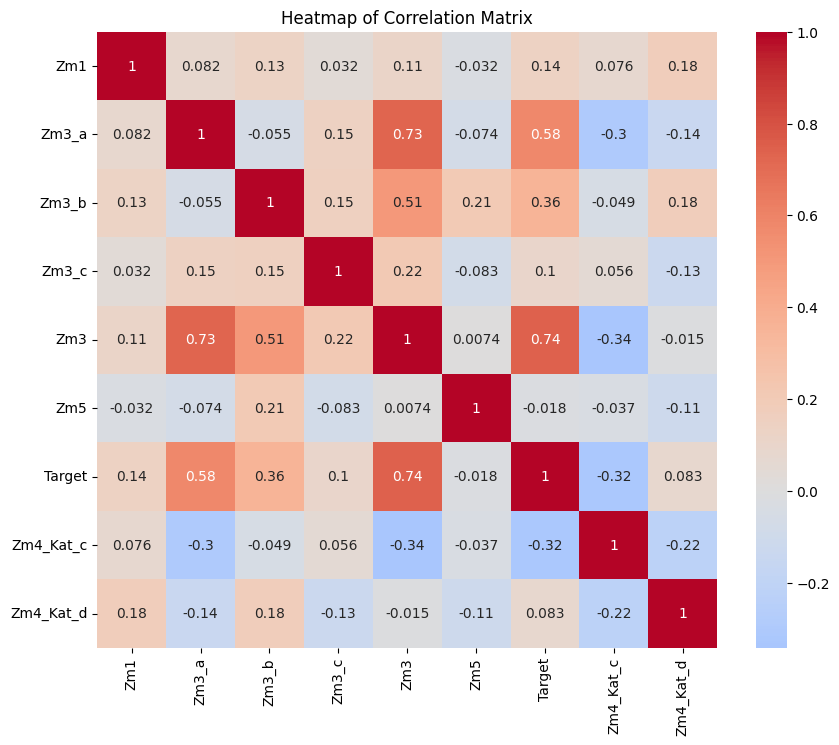

In [11]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Matrix')
plt.show()

- Kolumny Zm3_a, Zm3_b, Zm3_c i Zm3 mogą być ze sobą silnie skorelowane, co mogłoby wpływać na model i jak zostało wspomiane, są komponentami zmiennej Zm3

In [12]:
removed_columns = ['Zm3_a', 'Zm3_b', 'Zm3_c',]
print(removed_columns)

['Zm3_a', 'Zm3_b', 'Zm3_c']


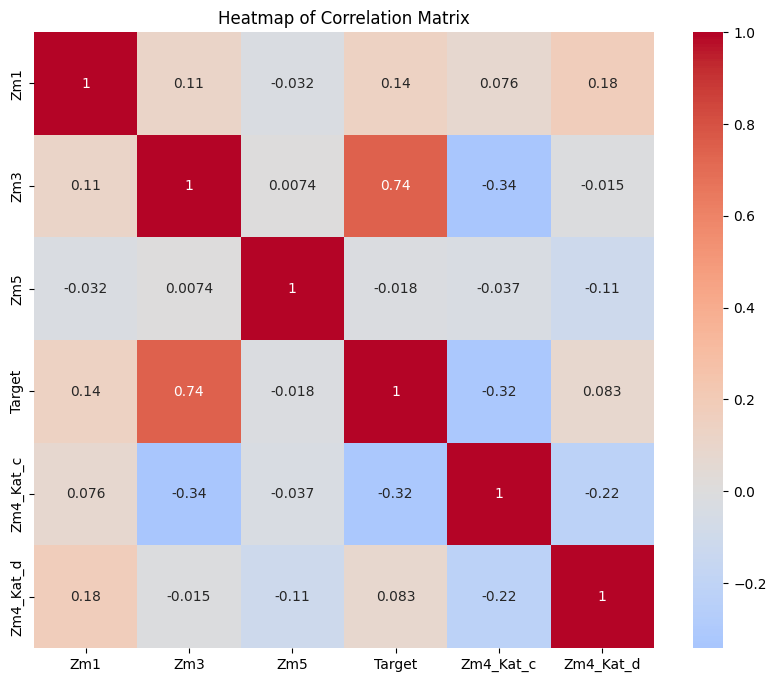

In [13]:
data=data.drop(columns=removed_columns)
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Matrix')
plt.show()

- Zmienna  Target jest binarna, co jest odpowiednie dla regresji logistycznej.
- Dane są stosunkowo czyste i kompletne, z wyjątkiem brakujących wartości w jednej kolumnie
- Zm3 jest najsilniej skorelowana z targetem


## Opracowanie modelu

Jeżeli nie zdecydujesz się opracować modelu, pozostaw tę sekcję pustą.

Jeśli decydujesz się opracować model, zamodeluj  `Target` w oparciu o zmienne `Zm1`-`Zm5` (zauważ, że `Zm3_a/b/c` są komponentami zmiennej `Zm3`). 

Możesz dokonywać standardowych przekształceń zmiennych `Zm` aby poprawić jakość działania modelu. 

Przedstaw i krótko opisz kolejne kroki modelowania.

Oceń jakość otrzymanego modelu.

In [14]:
X = data.drop(columns=['Target'])
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [18]:
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.9375

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[9, 1],
       [0, 6]])

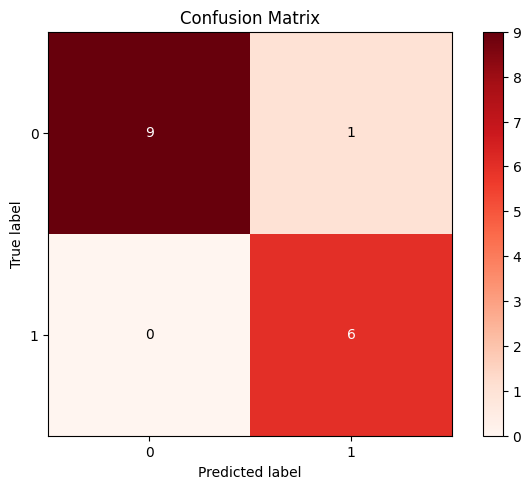

In [20]:

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()

classes=[0,1]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             ha="center", va="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()

In [21]:
class_report = classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.86      1.00      0.92         6

    accuracy                           0.94        16
   macro avg       0.93      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16



In [22]:
model = LogisticRegression()

# Walidacja krzyżowa K-fold
kf = KFold(n_splits=5, shuffle=True)
cv_scores = cross_val_score(model, X_scaled, y, cv=kf)

# Wyniki walidacji krzyżowej
print(f'CV Scores: {cv_scores}')
print(f'Mean CV Score: {np.mean(cv_scores)}')
print(f'Standard Deviation of CV Scores: {np.std(cv_scores)}')

CV Scores: [0.75       0.75       0.86666667 0.93333333 0.8       ]
Mean CV Score: 0.82
Standard Deviation of CV Scores: 0.07102425250887506


In [23]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

In [24]:
# Definicja gridu hiperparametrów do przetestowania
param_grid = {
    'model__penalty': ['elasticnet', 'l1', 'l2'],
    'model__solver': ['lbfgs', 'sag', 'saga', 'newton-cg'],
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__l1_ratio': [0, 0.5, 1]
}

In [25]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=kf, scoring='accuracy', verbose=1, n_jobs=-1)

In [26]:
grid_search.fit(X, y)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/home/pawel/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/pawel/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/pawel/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/pawel/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/pawel/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/pawel/.lo

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'model__l1_ratio': [0, 0.5, 1],
                         'model__penalty': ['elasticnet', 'l1', 'l2'],
                         'model__solver': ['lbfgs', 'sag', 'saga',
                                           'newton-cg']},
             scoring='accuracy', verbose=1)

In [27]:
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepszy wynik CV (accuracy):", grid_search.best_score_)

Najlepsze parametry: {'model__C': 0.1, 'model__l1_ratio': 0, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}
Najlepszy wynik CV (accuracy): 0.8716666666666667


In [28]:
best_params = {k.split('__')[1]: v for k, v in grid_search.best_params_.items()}
best_model = LogisticRegression(**best_params)

In [29]:
best_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, l1_ratio=0, penalty='elasticnet', solver='saga')

In [30]:
y_pred = best_model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [31]:
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.875

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[10,  0],
       [ 2,  4]])

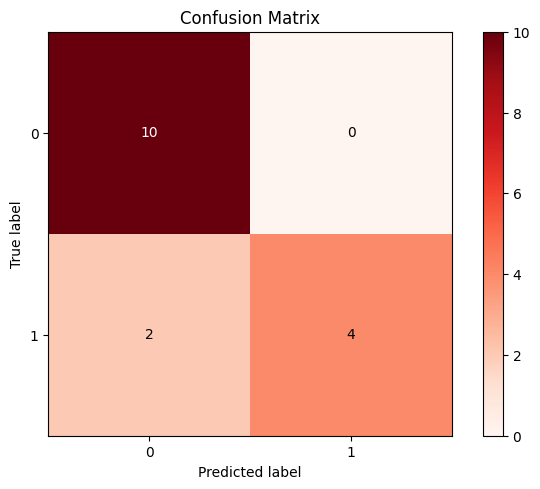

In [33]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()

classes=[0,1]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Wypisujemy liczby w kratkach
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             ha="center", va="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()

In [34]:
class_report = classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.67      0.80         6

    accuracy                           0.88        16
   macro avg       0.92      0.83      0.85        16
weighted avg       0.90      0.88      0.87        16



- Klasa 0 ma niższą precyzję w porównaniu do klasy 1, co oznacza, że model czasami błędnie klasyfikuje próbki jako klasa 0, które nie należą do tej klasy
- Klasa 0 ma najwyższą możliwą czułość (1.00), co oznacza, że wszystkie próbki klasy 0 zostały poprawnie zidentyfikowane.
- Klasa 0 ma wyższy F1-score niż klasa 1, co jest wynikiem lepszej czułości dla klasy 0.

Podsumowując, model LogisticRegression ma dobrą ogólną wydajność, ale jest lepszy w identyfikowaniu próbek klasy 0 niż klasy 1, co sugeruje, że może istnieć problem z równoważeniem klasyfikacji dla obu klas. Może to być spowodowane nierówną liczbą próbek lub różnicami w charakterystyce danych dla tych klas.